# Promoter Tests 1

In this experiment, we have tried three different candidate promoters: Arabinose, Lac (via IPTG) annd Rhamnose

In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '../../')
import BrasilUSP_iGEM_LabLib as LabLib

import scipy.stats
import pylab as pl
import numpy as np
import glob
from math import sqrt



## Definitions...

def biolrepl(wells):
    return np.array( [ wells[0:3].mean(), wells[3:6].mean(), wells[6:9].mean() ] ), \
        np.array( [ np.std(wells[0:3]), np.std(wells[3:6]), np.std(wells[6:9]) ] )

ColumnNames = {
    'A' : "NoPlasmid",
    'B' : "+control",
    'C' : "ZeroC",
    'D' : "C1",
    'E' : "C2",
    'F' : "C3",
    'G' : "C4",
    'H' : "C5",
}

MeaningColNames = { v: k for k, v in ColumnNames.items()}

def allCols(labels, r0 = 1, rf = 9):
    if type(labels) != list: 
        labels = [labels]
    cols = []
    for label in labels:
        row  = MeaningColNames[label]
        for j in range(r0,rf+1):
            cols.append(row + '0' + str(j))
    return cols

### Reading measurements

In [2]:
# Indexes of promoters
Pidxs = ['Rha', 'ara', 'IPTG']
Pcolors = {'Rha' : (0.3,0.5,1.0), 'ara' : (1.0,0.5,0.3), 'IPTG' : (0.5,1.0,0.3)}

FLlist = {}
tidx = {}
for P in Pidxs: 
    FLlist[P] = []
    tidx[P] = []

for file in glob.glob("medida*.txt"):
    P = file.split(' ')[2].split('.')[0]
    tidx[P].append( float( file.split(' ')[1].split('.')[0] ) )
    FLlist[P].append(file)

for P in Pidxs: 
    Idx = np.argsort(tidx[P])
    FLlist[P] = np.array(FLlist[P])[Idx]

ODlist = []
for file in FLlist[P]:
    ODlist.append('OD'+file.split(' ')[1]+'.txt')

Now reading all the data...

In [3]:
fldata = {}
for P in Pidxs:
    fldata[P] = LabLib.ReadFluor_timefmt_nanomed(FLlist[P])

In [4]:
fldata['Rha'][allCols('NoPlasmid')].head(3)

,A01,A02,A03,A04,A05,A06,A07,A08,A09
0,751.726,794.078,727.452,771.491,856.548,875.459,866.930,934.860,1045.189
1,730.244,788.235,695.977,675.974,748.068,767.157,759.985,940.607,921.377
2,749.920,778.396,752.527,693.046,735.712,789.090,754.125,820.643,890.938


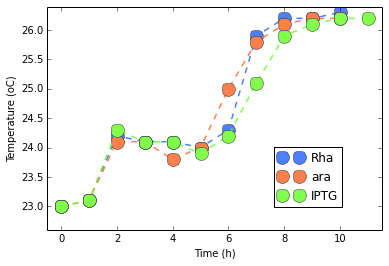

In [5]:
for P in Pidxs:
    pl.plot(fldata[P]['T(oC)'], 'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('Temperature (oC)')
pl.ylim(22.6,26.4)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Temperature seems quite reasonable accross different boards.

### OD measurements

In [6]:
oddata = LabLib.ReadFluor_timefmt_nanomed(ODlist, nr_header=2)

In [8]:
# Board configuration
ODorganization = {
    '+control'  : ['A05', 'A06', 'A07'],
    'ara'  : ['A08', 'A09', 'A10'],
    'IPTG' : ['A11', 'A12', 'B01'],
    'Rha'  : ['B02', 'B03', 'B04'],
    }

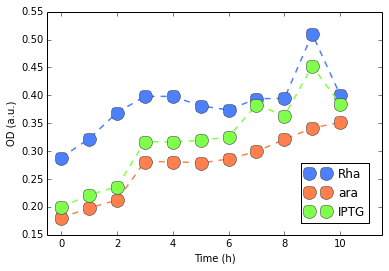

In [10]:
for P in Pidxs:
    pl.plot(np.mean(np.array(oddata[ODorganization[P]]), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('OD (a.u.)')
pl.legend(bbox_to_anchor=(0.98, 0.35))
pl.show()
pl.show()

### Baselines: +control and NoPlasmid

Blue   = Rha
Orange = Ara
Green  = IPTG


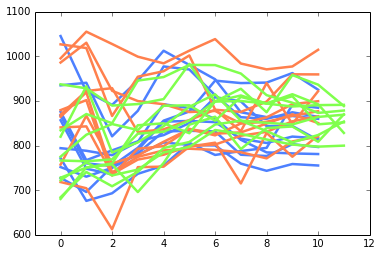

In [11]:
print 'Blue   = Rha'
print 'Orange = Ara'
print 'Green  = IPTG'

for P in Pidxs:
    pl.plot(fldata[P][allCols('NoPlasmid')], color=Pcolors[P], lw=2.5)

pl.xlim(-1,12)
pl.show()

As expected, we see no significant differences (still got to do a statistical test!).

Blue   = Rha
Orange = Ara
Green  = IPTG


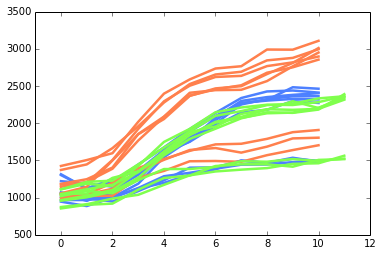

In [12]:
print 'Blue   = Rha'
print 'Orange = Ara'
print 'Green  = IPTG'

for P in Pidxs:
    pl.plot(fldata[P][allCols('+control')], color=Pcolors[P], lw=2.5)

pl.xlim(-1,12)
pl.show()

Rhamnose seems to be the stronger promoter to the positive control. It looks like a clear sign in this direction. Let's now take a look at the average value as function of time.

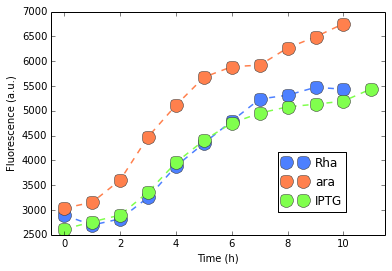

In [13]:
for P in Pidxs:
    pl.plot(np.mean(np.array( fldata[P][allCols('+control')]/oddata[ODorganization['+control']].mean().mean() ), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('Fluorescence (a.u.)')
#pl.ylim(800,2700)
pl.legend(bbox_to_anchor=(0.9, 0.4))
pl.show()

Just to have an idea of the order of the fluorescence differences, let's evaluate the average difference between Arabinose and Rhamnose.

In [14]:
ZC_rha  = np.mean(np.array(fldata['Rha'][allCols('+control')]), axis=1)
ZC_ara  = np.mean(np.array(fldata['ara'][allCols('+control')]), axis=1)
print "Rha - Ara  =  %5.1f" % ( np.abs( ZC_rha - ZC_ara  ).mean() )

Rha - Ara  =  355.7


### Quick check on the zero-concentration data


Next, let's see how is the zero-concentration evolving.

In [15]:
Normd = {}
for P in Pidxs:
    Normd[P] = fldata[P][allCols('ZeroC')]/oddata[ODorganization[P]].mean().mean()

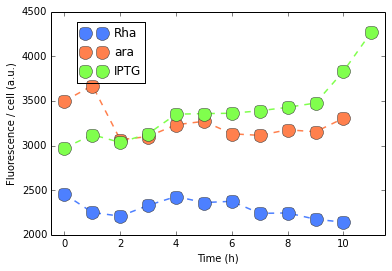

In [16]:
for P in Pidxs:
    pl.plot(np.mean(np.array(Normd[P][allCols('ZeroC')]), axis=1), 
            'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('Fluorescence / cell (a.u.)')
#pl.ylim(700,1400)
pl.legend(bbox_to_anchor=(0.3, 0.98))
pl.show()

They have mostly the same level of activity. The average difference in the zero-concentration may give us a base-line for comparison. To evaluate these differences, however, I will disregard the last two points.

In [17]:
ZC_rha  = np.mean(np.array(fldata['Rha'][allCols('ZeroC')]), axis=1)[:-1]
ZC_ara  = np.mean(np.array(fldata['ara'][allCols('ZeroC')]), axis=1)[:-1]
ZC_iptg = np.mean(np.array(fldata['IPTG'][allCols('ZeroC')]), axis=1)[:-2]

print "Rha - Ara  =  %5.1f" % ( np.abs( ZC_rha - ZC_ara  ).mean() )
print "Rha - IPTG =  %5.1f" % ( np.abs( ZC_rha - ZC_iptg ).mean() )
print "Ara - IPTG =  %5.1f" % ( np.abs( ZC_ara - ZC_iptg ).mean() )

Rha - Ara  =   36.1
Rha - IPTG =  156.7
Ara - IPTG =  155.7


Thus, if we have a difference larger than $200$ u.a., we can regard it as a good result.

### Preparing and normalizing promoter data

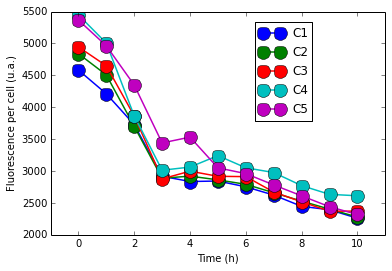

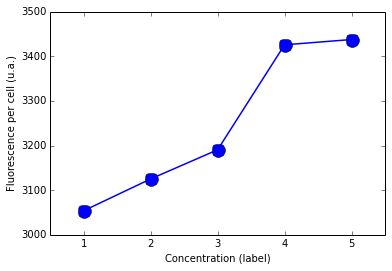

In [102]:
P = 'ara'
mds = []
for j in ['C1', 'C2', 'C3', 'C4', 'C5']:
    Cj_ts = np.mean(np.array(fldata[P][allCols(j)]), axis=1)[:11]/np.mean(np.array( oddata[ODorganization[P]] ), axis=1)
    pl.plot( Cj_ts, 'o-', lw=1.5, markersize=13., label=j)
    mds.append( Cj_ts.mean() )
    
pl.xlim(-1,11)
pl.xlabel('Time (h)')
pl.ylabel('Fluorescence per cell (u.a.)')
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()


pl.plot(range(1,6), mds, 'o-', lw=1.5, markersize=13.)
pl.xlim(0.5,5.5)
pl.xlabel('Concentration (label)')
pl.ylim(3000, 3500)
pl.ylabel('Fluorescence per cell (u.a.)')
pl.show()

Notice that the difference in the fluorescence is rather small: from $3000$ to $3500$.

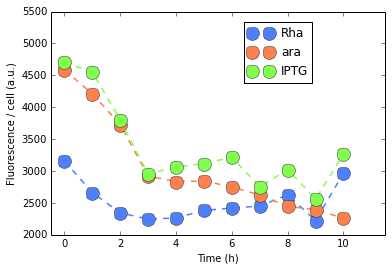

In [96]:
for P in Pidxs:
    pl.plot( 
        np.mean(np.array(fldata[P][allCols('C1')]), axis=1)[:11]/np.mean(np.array( oddata[ODorganization[P]] ), axis=1), 
       'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('Fluorescence / cell (a.u.)')
pl.ylim(2000,5500)
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()

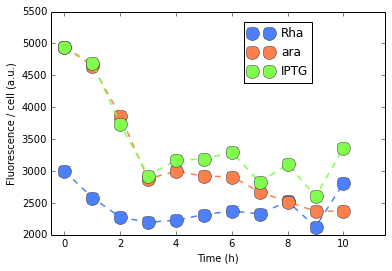

In [97]:
for P in Pidxs:
    pl.plot( 
        np.mean(np.array(fldata[P][allCols('C3')]), axis=1)[:11]/np.mean(np.array( oddata[ODorganization[P]] ), axis=1) ,
        'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('Fluorescence / cell (a.u.)')
pl.ylim(2000,5500)
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()

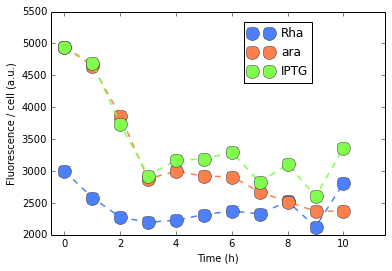

In [93]:
for P in Pidxs:
    pl.plot( 
        np.mean(np.array(fldata[P][allCols('C3')]), axis=1)[:11]/np.mean(np.array( oddata[ODorganization[P]] ), axis=1), 
        'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlabel('Time (h)')
pl.xlim(-0.5,11.5)
pl.ylabel('Fluorescence / cell (a.u.)')
pl.ylim(2000,5500)
pl.legend(bbox_to_anchor=(0.8, 0.98))
pl.show()

### Comparing Averages vs Concentration

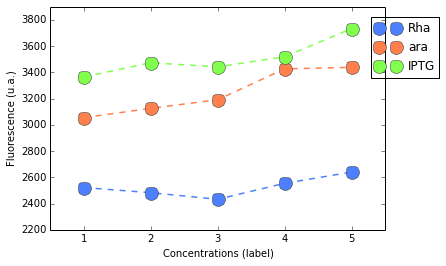

In [105]:
Means = {}
for P in Pidxs:
    Means[P] = []
X = range(1,6)

for j in ['C1','C2','C3','C4','C5']:
    for P in Pidxs:
        Means[P].append( 
            ( np.mean(np.array(fldata[P][allCols(j)]), axis=1)[:11] /
             np.mean(np.array( oddata[ODorganization[P]] ), axis=1) ).mean()
        )

for P in Pidxs:
    pl.plot( X,Means[P], 'o--', lw=1.5, markersize=13., color=Pcolors[P], markeredgecolor=(0.2,0.2,0.2), label=P)

pl.xlim(0.5,5.5)
pl.xlabel('Concentrations (label)')
pl.ylim(2200,3900)
pl.ylabel('Fluorescence (u.a.)')
pl.legend(bbox_to_anchor=(1.18, 0.98))
pl.show()

Notice the scale is quite large. IPTG seems to be the one with optimal expression.